In [48]:
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [49]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# # Create an endpoint URL for a city.
# city_url = url + "&q=" + "Boston"
# # Make a 'Get' request for the city weather.
# city_weather = requests.get(city_url)

In [50]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#zip packs each pair of lats and lngs having the same index in their respective array into a tuple. 
#1500 pairs of tuples that can be accessed by the index 0 & 1
lat_lngs = zip(lats, lngs)
lat_lngs

# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [51]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rocha
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 7 of Set 1 | namatanai
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | sao miguel do araguaia
Processing Record 11 of Set 1 | cristalina
Processing Record 12 of Set 1 | marcona
City not found. Skipping...
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | coahuayana
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | dingle
Processing Record 18 of Set 1 | tefe
Processing Record 19 of Set 1 | saint anthony
Processing Record 20 of Set 1 | carnarvon
Processing Record

Processing Record 35 of Set 4 | ponta do sol
Processing Record 36 of Set 4 | sangar
Processing Record 37 of Set 4 | poum
Processing Record 38 of Set 4 | puerto quijarro
Processing Record 39 of Set 4 | verkh-usugli
Processing Record 40 of Set 4 | aljezur
Processing Record 41 of Set 4 | alice
Processing Record 42 of Set 4 | cockburn town
Processing Record 43 of Set 4 | gorontalo
Processing Record 44 of Set 4 | yerbogachen
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | tighina
Processing Record 48 of Set 4 | dulce grande
Processing Record 49 of Set 4 | karratha
Processing Record 50 of Set 4 | cherskiy
Processing Record 1 of Set 5 | sinnamary
Processing Record 2 of Set 5 | cascais
Processing Record 3 of Set 5 | blagoyevo
Processing Record 4 of Set 5 | djibo
Processing Record 5 of Set 5 | deputatskiy
Processing Record 6 of Set 5 | toliary
City not found. Skipping...
Processing Record 7 of Set 5 | constitucion
Proces

Processing Record 25 of Set 8 | labutta
City not found. Skipping...
Processing Record 26 of Set 8 | trenggalek
Processing Record 27 of Set 8 | aktau
Processing Record 28 of Set 8 | dagotiere
City not found. Skipping...
Processing Record 29 of Set 8 | ponta pora
Processing Record 30 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 31 of Set 8 | rawson
Processing Record 32 of Set 8 | berdigestyakh
Processing Record 33 of Set 8 | kaz
Processing Record 34 of Set 8 | abu samrah
Processing Record 35 of Set 8 | laguna
Processing Record 36 of Set 8 | luanda
Processing Record 37 of Set 8 | gordeyevka
Processing Record 38 of Set 8 | nago
Processing Record 39 of Set 8 | shuyskoye
Processing Record 40 of Set 8 | richards bay
Processing Record 41 of Set 8 | stornoway
City not found. Skipping...
Processing Record 42 of Set 8 | mareeba
Processing Record 43 of Set 8 | katangli
Processing Record 44 of Set 8 | banda aceh
Processing Record 45 of Set 8 | markala
Processing Record 46 of 

City not found. Skipping...
Processing Record 8 of Set 12 | quatre cocos
Processing Record 9 of Set 12 | mogadishu
Processing Record 10 of Set 12 | gat
Processing Record 11 of Set 12 | khandyga
Processing Record 12 of Set 12 | ichinoseki
Processing Record 13 of Set 12 | carson city
Processing Record 14 of Set 12 | ukiah
Processing Record 15 of Set 12 | maceio
Processing Record 16 of Set 12 | svetlaya
Processing Record 17 of Set 12 | new richmond
Processing Record 18 of Set 12 | abbeville
Processing Record 19 of Set 12 | viligili
City not found. Skipping...
Processing Record 20 of Set 12 | juruti
Processing Record 21 of Set 12 | dabat
Processing Record 22 of Set 12 | erzin
Processing Record 23 of Set 12 | grand centre
City not found. Skipping...
Processing Record 24 of Set 12 | izmit
Processing Record 25 of Set 12 | smolensk
Processing Record 26 of Set 12 | taltal
Processing Record 27 of Set 12 | amalapuram
Processing Record 28 of Set 12 | leshukonskoye
Processing Record 29 of Set 12 | 

In [52]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rocha,-34.48,-54.34,68.88,65,1,11.92,UY,2019-11-10 19:20:03
1,New Norfolk,-42.78,147.06,52.00,66,75,8.05,AU,2019-11-10 19:20:03
2,Pevek,69.70,170.27,8.42,66,71,2.28,RU,2019-11-10 19:20:03
3,Kaitangata,-46.28,169.85,48.00,71,100,8.01,NZ,2019-11-10 19:20:03
4,Namatanai,-3.66,152.44,81.72,72,99,7.38,PG,2019-11-10 19:15:25
5,Victoria,5.28,115.24,78.80,88,75,5.17,BN,2019-11-10 19:20:04
6,Jamestown,-33.21,138.60,56.44,29,0,8.50,AU,2019-11-10 19:20:04
7,Sao Miguel Do Araguaia,-13.28,-50.16,98.62,32,86,3.02,BR,2019-11-10 19:20:04
8,Cristalina,-16.77,-47.61,89.24,31,25,5.50,BR,2019-11-10 19:20:04
9,Tuktoyaktuk,69.44,-133.03,3.20,71,5,9.17,CA,2019-11-10 19:20:05


In [53]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [54]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

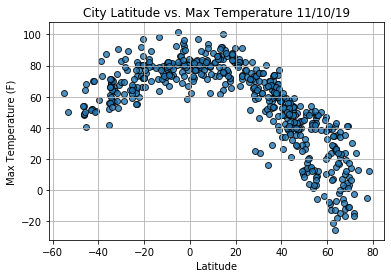

In [56]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

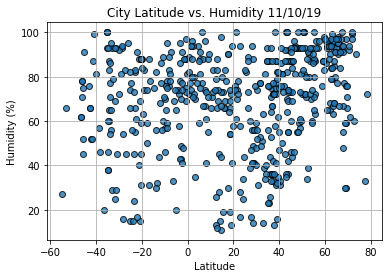

In [57]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()